<a href="https://colab.research.google.com/github/samuelhtampubolon/SDPM2025/blob/main/Linear_Regression_with_Builtin_Iris_Dataset_Petal_Features_Using_Statsmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import statsmodels.api as sm

In [2]:
# Load built-in iris dataset, use petal length/width for regression
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
X = df[['petal length (cm)']]
y = df['petal width (cm)']
X = sm.add_constant(X)  # Add intercept

In [3]:
# Train model
model = sm.OLS(y, X).fit()

In [4]:
# Predictions and metrics
y_pred = model.predict(X)
print("Summary Stats:\n", model.summary().tables[1])
print("R-squared:", model.rsquared)

Summary Stats:
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.3631      0.040     -9.131      0.000      -0.442      -0.285
petal length (cm)     0.4158      0.010     43.387      0.000       0.397       0.435
R-squared: 0.9271098389904927


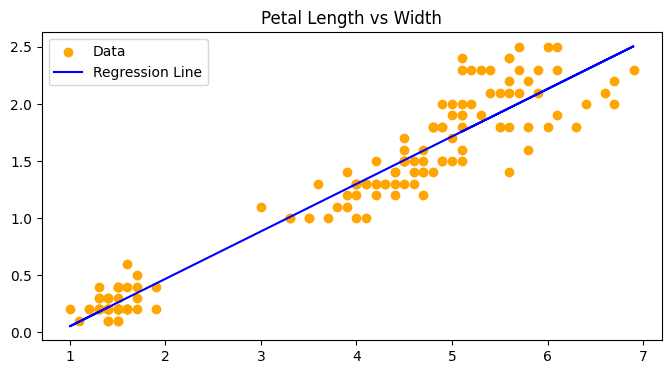

In [5]:
# Visual 1: Scatter with Regression Line
plt.figure(figsize=(8, 4))
plt.scatter(df['petal length (cm)'], y, color='orange', label='Data')
plt.plot(df['petal length (cm)'], y_pred, color='blue', label='Regression Line')
plt.legend()
plt.title('Petal Length vs Width')
plt.show()

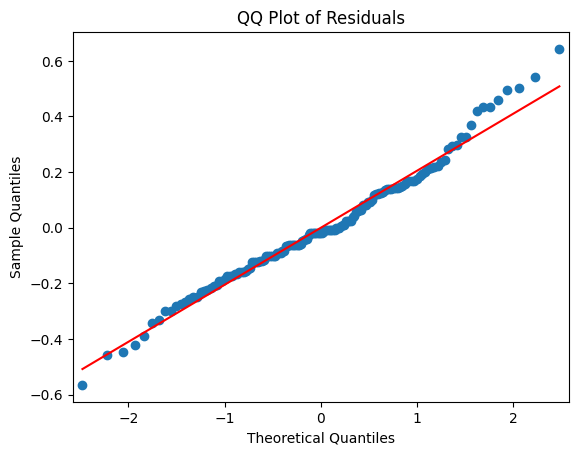

In [6]:
# Visual 2: QQ Plot for Residuals
residuals = model.resid
fig = sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()